In [12]:
#第一步，将"weibo_content"为“转发微博”或“快转微博”的数据替换成“r_weibo_content”的内容

In [120]:
#读取文件并转换成dataframe格式
import pandas as pd
import json

weibo_folder = 'weibo/'

data = []
with open(weibo_folder+ 'output.ndjson', 'r') as file:
    for line in file:
        data.append(json.loads(line))

# 将数据转换为DataFrame
df = pd.DataFrame(data)

In [121]:
# 查看'weibo_content'中内容为‘转发微博’或者‘快转微博’的行
mask = df['weibo_content'].str.match('转发微博' or '快转微博')
result = df[mask]
df1 = pd.DataFrame(result['weibo_content'])
print(df1)


       weibo_content
0               转发微博
10              转发微博
15              转发微博
23              转发微博
29              转发微博
...              ...
370164          转发微博
370171          转发微博
370178          转发微博
370180          转发微博
370186          转发微博

[44818 rows x 1 columns]


In [122]:
# 使用 loc 函数选取符合条件的行，并将 'weibo_content' 列替换为 'r_weibo_content' 列
df.loc[df['weibo_content'].isin(['转发微博', '快转微博']), 'weibo_content'] = df['r_weibo_content']

# 输出修改后的 dataframe
# print(df)

In [112]:
#再次查看替换的效果，发现已全部替换
mask = df['weibo_content'].str.match('转发微博' or '快转微博')
result = df[mask]
df2 = pd.DataFrame(result['weibo_content'])
#print(df2)

                                            weibo_content
764                                       转发微博//@帕金森氏三:转发
2638                                      转发微博//@罗大伦:转发微博
3200        转发微博//@Devil_angel96:It’s hard to say goodbye
3335                                       转发微博//@接臧:转发微博
8450                                     转发微博//@快乐买谷:【投稿】
...                                                   ...
327277  转发微博//@文明冲浪指南:怎么会这么好笑//@神奇的哈哈酱:哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈...
328494  转发微博//@赏味不足:啥玩意儿？？？//@Alysa艾梨利莎: ？？？吓到我了//@妖盐货...
331793  转发微博//@Yoo酱酱酱:[蜡烛]走好//@白饭_WHITE:[蜡烛]//@集真藍://@...
332444                                  转发微博//@炮兵杨昭友:转发微博
366481                     转发微博。同“拜拜”“帕金森”一样，都是垃圾音译，污染汉语。

[100 rows x 1 columns]


In [126]:
# 保存处理的好的数据至weibo文件夹中，命名为new_data.csv
df.to_csv("weibo/new_data.csv",index=False,encoding="utf_8_sig")

In [14]:
#第二步，清洗数据

In [113]:
import pandas as pd
import re
import emoji
import opencc

In [114]:
# 初始化OpenCC对象
converter = opencc.OpenCC('t2s.json')

In [127]:
new_data=pd.read_csv("weibo/new_data.csv",encoding="utf_8_sig")
new_data['weibo_content']

/tmp/ipykernel_4014814/3459472299.py:1: DtypeWarning: Columns (14,35) have mixed types. Specify dtype option on import or set low_memory=False.
  new_data=pd.read_csv("weibo/new_data.csv",encoding="utf_8_sig")


0         #南车微视角#  【#世界帕金森病日#|这位“老年杀手”，要当心！[话筒]】帕金森病是一种神...
1                                                   有这么绝的图哦
2         好看[抓狂][抓狂][抓狂]//@狗狗热刊报道:黑白滤镜好配他[悲伤]//@-APRILSE...
3         看了《妈妈!》。\n中间阿尔兹海默病老人们一起谈论妈妈的那段最让人感动，虽然患病，每位老人也...
4         //@渠兮:好家伙//@皮皮辣酱:懂了//@绝望的野王:磕死我了//@久居仲夏:ddddna...
                                ...                        
370184                     喜欢一个人待着的时间\\\\ 我是不是有帕金森啊这手抖的 ​​​
370185                                          帕金森治愈计划 ​​​
370186    重大突破！科学家利用iPSC首次培养出高度成熟神经元，有望治疗帕金森/阿尔兹海默症等神经退行...
370187    重大突破！科学家利用iPSC首次培养出高度成熟神经元，有望治疗帕金森/阿尔兹海默症等神经退行...
370188    偶然间刷到的视频，90后母亲患阿尔兹海默症，父亲患帕金森综合症，记录他们的点点滴滴。在这个时...
Name: weibo_content, Length: 370189, dtype: object

In [128]:
# 定义一个清洗函数
def clean_text(text):
    # 去除链接
    text = re.sub(r'http\S+', '', text)
    # 去除表情
    text = emoji.demojize(text, delimiters=("", ""))
    # 将繁体字转换为简体中文
    text = converter.convert(text)
    # 去除特殊符号
    text = re.sub(r'[^\w\s]', '', text)
    # 将英文转换为简体中文
    #text = converter.convert(text, config='s2hk.json')
    # 去除空格
    text = text.strip()
    return text

In [129]:
# 应用清洗函数到“weibo_content”列
new_data['weibo_content'] = new_data['weibo_content'].apply(clean_text)
new_data['weibo_content'] 

0         南车微视角  世界帕金森病日这位老年杀手要当心话筒帕金森病是一种神经系统退行性疾病在中老年人...
1                                                   有这么绝的图哦
2         好看抓狂抓狂抓狂狗狗热刊报道黑白滤镜好配他悲伤APRILSEVEN那也是一组神图我像天使李现...
3         看了妈妈n中间阿尔兹海默病老人们一起谈论妈妈的那段最让人感动虽然患病每位老人也都记得自己的妈...
4         渠兮好家伙皮皮辣酱懂了绝望的野王磕死我了久居仲夏ddddna开开开始帕金森了了了了了吻博卧槽...
                                ...                        
370184                             喜欢一个人待着的时间 我是不是有帕金森啊这手抖的
370185                                              帕金森治愈计划
370186    重大突破科学家利用iPSC首次培养出高度成熟神经元有望治疗帕金森阿尔兹海默症等神经退行性疾病...
370187    重大突破科学家利用iPSC首次培养出高度成熟神经元有望治疗帕金森阿尔兹海默症等神经退行性疾病...
370188    偶然间刷到的视频90后母亲患阿尔兹海默症父亲患帕金森综合症记录他们的点点滴滴在这个时间点哭得...
Name: weibo_content, Length: 370189, dtype: object

In [ ]:
#第三步，剔除与与PD无关的广告、明星营销数据（二分类）

In [208]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [209]:
data = pd.read_csv("weibo/data_to_preprocessing.csv")

In [210]:
data['weibo_content'] = data['weibo_content'].astype(str)
data['weibo_content'] = data['weibo_content'].apply(clean_text)

In [211]:
data.rename(columns={'weibo_content': 'text'}, inplace=True)

In [212]:
# 将数据集拆分为训练集、验证集和测试集
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.1, random_state=42)

# 加载标签和文本
train_labels = train_data.labels.values
val_labels = val_data.labels.values
test_labels = test_data.labels.values

train_texts = train_data.text.values
val_texts = val_data.text.values
test_texts = test_data.text.values

In [213]:
train_texts=train_texts.tolist()
val_texts=val_texts.tolist()
test_texts=test_texts.tolist()

In [214]:
train_texts_s= [str(obj) for obj in train_texts]
val_texts_s= [str(obj) for obj in val_texts]
test_texts_s= [str(obj) for obj in test_texts]

In [ ]:
# 对文本进行标记化和编码
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-chinese')

train_encodings = tokenizer(train_texts.tolist(), truncation=True, padding=True)
val_encodings = tokenizer(val_texts.tolist(), truncation=True, padding=True)
test_encodings = tokenizer(test_texts.tolist(), truncation=True, padding=True)

In [215]:
# 创建数据加载器
import torch

class WeiboDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = WeiboDataset(train_encodings, train_labels)
val_dataset = WeiboDataset(val_encodings, val_labels)
test_dataset = WeiboDataset(test_encodings, test_labels)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=16, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=16, shuffle=True)

In [216]:
from transformers import BertForSequenceClassification, AdamW
from tqdm import tqdm

# 加载BERT模型
model = BertForSequenceClassification.from_pretrained('bert-base-chinese', num_labels=2)

Some weights of the model checkpoint at bert-base-chinese were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 34.06it/s]


Epoch 1/10:
Train Loss: 0.3424  Train Accuracy: 0.8708
Val Loss: 0.1545  Val Accuracy: 0.9625
--------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 34.38it/s]


Epoch 2/10:
Train Loss: 0.1483  Train Accuracy: 0.9465
Val Loss: 0.1129  Val Accuracy: 0.9688
--------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 33.88it/s]


Epoch 3/10:
Train Loss: 0.0615  Train Accuracy: 0.9806
Val Loss: 0.1228  Val Accuracy: 0.9625
--------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 34.06it/s]


Epoch 4/10:
Train Loss: 0.0338  Train Accuracy: 0.9917
Val Loss: 0.1039  Val Accuracy: 0.9750
--------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 33.73it/s]


Epoch 5/10:
Train Loss: 0.0311  Train Accuracy: 0.9917
Val Loss: 0.2293  Val Accuracy: 0.9500
--------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 33.75it/s]


Epoch 6/10:
Train Loss: 0.0094  Train Accuracy: 0.9979
Val Loss: 0.1345  Val Accuracy: 0.9688
--------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 33.70it/s]


Epoch 7/10:
Train Loss: 0.0094  Train Accuracy: 0.9972
Val Loss: 0.1483  Val Accuracy: 0.9688
--------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 33.61it/s]


Epoch 8/10:
Train Loss: 0.0048  Train Accuracy: 0.9993
Val Loss: 0.1289  Val Accuracy: 0.9812
--------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 33.47it/s]


Epoch 9/10:
Train Loss: 0.0018  Train Accuracy: 1.0000
Val Loss: 0.1340  Val Accuracy: 0.9750
--------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 33.56it/s]


Epoch 10/10:
Train Loss: 0.0013  Train Accuracy: 1.0000
Val Loss: 0.1402  Val Accuracy: 0.9688
--------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 32.33it/s]


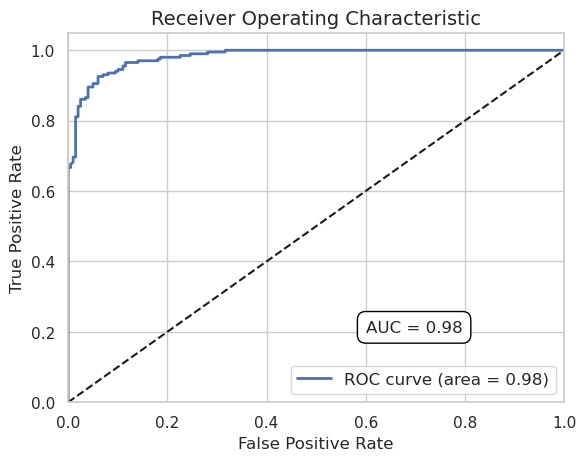

Accuracy: 0.9225
Precision: 0.9126
Recall: 0.9353
F1 Score: 0.9238
AUC: 0.9820


('bert_weibo_model_1/tokenizer_config.json',
 'bert_weibo_model_1/special_tokens_map.json',
 'bert_weibo_model_1/vocab.txt',
 'bert_weibo_model_1/added_tokens.json')

In [217]:
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 定义训练参数
optimizer = optim.AdamW(model.parameters(), lr=1e-5, eps=1e-8, weight_decay=0.01)  # 添加L2正则化项
scheduler = ReduceLROnPlateau(optimizer, 'min', patience=2)

num_epochs = 10

train_losses = []  # 存储训练损失的列表
train_accs = []  # 存储训练集的准确度
val_losses = []  # 存储验证损失的列表
val_accs = []  # 存储验证集的准确度
test_probs = []  # 存储测试集的预测概率
test_labels = []  # 存储测试集的真实标签

# 训练BERT模型
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

best_val_loss = float('inf')
best_val_acc = 0

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    correct = 0
    total = 0
    for batch in tqdm(train_loader):
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        _, predicted = torch.max(outputs.logits, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    train_loss /= len(train_loader)
    train_acc = correct / total
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    
    # 在验证集上评估模型，并记录验证集的损失和准确度
    model.eval()
    val_loss = 0
    correct = 0
    total = 0
    val_probs = []
    val_labels = []
    with torch.no_grad():
        for batch in tqdm(val_loader):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            val_loss += loss.item()
            val_probs.extend(outputs.logits.softmax(dim=1).cpu().numpy())
            val_labels.extend(labels.cpu().numpy())
            _, predicted = torch.max(outputs.logits, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_loss /= len(val_loader)
    val_acc = correct / total
    val_losses.append(val_loss)
    val_accs.append(val_acc)
    
    # 保存在验证集上表现最好的模型参数
    if val_acc > best_val_acc:
        best_val_loss = val_loss
        best_val_acc = val_acc
        torch.save(model.state_dict(), 'best_model.pth')
    
    # 动态调整学习率
    scheduler.step(val_loss)

    # 打印训练损失和准确度
    print(f'Epoch {epoch+1}/{num_epochs}:')
    print(f'Train Loss: {train_loss:.4f}  Train Accuracy: {train_acc:.4f}')
    print(f'Val Loss: {val_loss:.4f}  Val Accuracy: {val_acc:.4f}')
    print('--------------------------')


# 在测试集上评估模型，并记录预测概率和真实标签
model.eval()
test_loss = 0
correct = 0
total = 0
test_probs = []
test_labels = []
with torch.no_grad():
    for batch in tqdm(test_loader):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        test_loss += loss.item()
        test_probs.extend(outputs.logits.softmax(dim=1).cpu().numpy())
        test_labels.extend(labels.cpu().numpy())
        _, predicted = torch.max(outputs.logits, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_loss /= len(test_loader)
test_acc = correct / total

# 将test_probs转换为NumPy数组
test_probs = np.array(test_probs)

# 计算ROC曲线和AUC值
fpr, tpr, _ = roc_curve(test_labels, test_probs[:, 1])
roc_auc = auc(fpr, tpr)

# 绘制ROC曲线
plt.figure()
sns.set(style="whitegrid")
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic', fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.text(0.6, 0.2, 'AUC = %0.2f' % roc_auc, fontsize=12, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.savefig('roc_curve_model1.jpg', dpi=600)
plt.show()

# 计算其他指标
test_pred_labels = np.argmax(test_probs, axis=1)
test_accuracy = accuracy_score(test_labels, test_pred_labels)
test_precision = precision_score(test_labels, test_pred_labels)
test_recall = recall_score(test_labels, test_pred_labels)
test_f1_score = f1_score(test_labels, test_pred_labels)

# 打印测试集的指标
print('Accuracy: %.4f' % test_accuracy)
print('Precision: %.4f' % test_precision)
print('Recall: %.4f' % test_recall)
print('F1 Score: %.4f' % test_f1_score)
print('AUC: %.4f' % roc_auc)

# 保存模型
model.save_pretrained("bert_weibo_model_1")
tokenizer.save_pretrained("bert_weibo_model_1")


In [144]:
#编写脚本来预测大量的文件
import pandas as pd
import torch
from transformers import BertTokenizer, BertForSequenceClassification

In [145]:
model_path = 'bert_weibo_model_1'
model = BertForSequenceClassification.from_pretrained(model_path)
tokenizer = BertTokenizer.from_pretrained(model_path)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(21128, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [146]:
new_data= new_data.dropna(subset=['weibo_content'])

In [147]:
# 定义一个函数，该函数将文本数据转换为Bert的输入格式
def preprocess(text):
    encoded = tokenizer.encode_plus(
        text,
        max_length=512,
        padding='max_length',
        truncation=True,
        return_tensors='pt'
    )
    return encoded['input_ids'], encoded['attention_mask']

In [149]:
model.eval()
predictions = []
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

for i, row in new_data.iterrows():
    input_ids, attention_mask = preprocess(row['weibo_content'])
    input_ids = input_ids.to(device)
    attention_mask = attention_mask.to(device)
    
    with torch.no_grad():
        outputs = model(input_ids, attention_mask)
    
    _, predicted_label = torch.max(outputs[0], dim=1)
    predictions.append(predicted_label.item())

In [150]:
new_data['pre_labels'] = predictions

In [151]:
new_data=new_data[new_data.pre_labels!=0]

In [152]:
new_data.drop("pre_labels", axis=1, inplace=True)

In [153]:
new_data.to_csv('cleaned_data.csv', index=False)